RESAS
https://resas-portal.go.jp/

モバイル空間統計_NTTドコモを用いて
訪日外国人数を月単位で、47都道府県で表示(2015年分)

In [1]:
# coding: UTF-8
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
import matplotlib.font_manager as fm

API_ENDPOINT = "https://opendata.resas-portal.go.jp/"
API_KEY = "	Ue7YpUG..." # RESAS API KEY
DKUKAN_INBOUND = "api/v1/partner/docomo/inbound"
RESAS_PREF = "api/v1/prefectures"

def get(url):
  header = {"X-API-KEY":API_KEY}
  r = requests.get(url, headers=header)
  return r

def get_prefs():
  url = API_ENDPOINT + RESAS_PREF
  return get(url)

def get_data(year, month, pref):
  url = API_ENDPOINT + DKUKAN_INBOUND + "?year="+str(year)+"&month="+str(month)+"&prefCode="+str(pref)+"&periodOfTime=1"
  return get(url)

prefs = get_prefs()
dicPrefs = {}
for pref in prefs.json()["result"]:
  dicPrefs.update({pref["prefCode"]:pref["prefName"]})

In [27]:
def get_code_from_name(name):
  if name == u"アメリカ合衆国":
    return "us"
  elif name == u"イギリス":
    return "uk"
  elif name == u"オーストラリア":
    return "Australia"
  elif name == u"タイ":
    return "Thai"
  elif name == u"ドイツ":
    return "Germeny"
  elif name == u"フランス":
    return "France"
  elif name == u"マレーシア":
    return "Malaysia"
  elif name == u"中華人民共和国":
    return "China"
  elif name == u"台湾":
    return "Taiwan"
  elif name == u"大韓民国":
    return "Korea"
  elif name == u"香港":
    return "Hongkong"
  elif name == u"ベトナム":
    return "Vietnam"
  elif name == u"イタリア":
    return "Italia"
  elif name == u"シンガポール":
    return "Singapore"
  elif name == u"ロシア":
    return "Russia"
  elif name == u"インドネシア":
    return "Indonesia"
  elif name == u"トルコ":
    return "Terkey"
  elif name == u"スウェーデン":
    return "Sweeden"
  elif name== u"デンマーク":
    return "Denmark"
  elif name == u"フィンランド":
    return "Finland"
  elif name == u"メキシコ":
    return "Mexico"
  elif name == u"カナダ":
    return "Canada"
  elif name == u"アラブ首長国連邦":
    return "UAE"
  elif name == u"カタール":
    return "Qatar"
  elif name == u"アルゼンチン":
    return "Argentina"
  elif name == u"イスラエル":
    return "Israel"
  elif name == u"インド":
    return "India"
  elif name == u"エストニア":
    return "Estonia"
  elif name == u"オランダ":
    return "Netherlands"
  elif name == u"オーストリア":
    return "Austria"
  elif name == u"サウジアラビア":
    return "Saudi Arabia"
  elif name == u"スイス":
    return "Switzerland"
  elif name == u"スペイン":
    return "Spain"
  elif name == u"チェコ":
    return "Czech Republic"
  elif name == u"ニュージーランド":
    return "New zealand"
  elif name == u"ノルウェー":
    return "Norway"
  elif name == u"ハンガリー":
    return "Hungary"
  elif name == u"バーレーン":
    return "Bahrain"
  elif name == u"フィリピン":
    return "Philippines"
  elif name == u"ブラジル":
    return "Brazil"
  elif name == u"ベルギー":
    return "Belgium"
  elif name == u"ポルトガル":
    return "Portugal"
  elif name == u"ポーランド":
    return "Poland"
  elif name == u"マルタ":
    return "Malta"
  elif name == u"ルクセンブルク":
    return "Luxembourg"
  elif name == u"ルーマニア":
    return "Romania"
  elif name == u"セルビア":
    return "Serbia"
  elif name == u"チリ":
    return "Chile"
  elif name == u"ブルガリア":
    return "Bulgaria"
  elif name == u"ブルネイ":
    return "Brunei"
  elif name == u"モンゴル":
    return "Mongolia"
  elif name == u"ヨルダン":
    return "Jordan"
  elif name == u"ラオス":
    return "Laos"
  elif name == u"リトアニア":
    return "Lithuania"
  elif name == u"アイルランド":
    return "Ireland"
  elif name == u"ウルグアイ":
    return "Uruguay"
  elif name == u"エジプト":
    return "Egypt"
  elif name == u"オマーン":
    return "Oman"
  elif name == u"カンボジア":
    return "Cambodia"
  elif name == u"ギリシャ":
    return "Greece"
  elif name == u"クロアチア":
    return "Croatia"
  elif name == u"アイスランド":
    return "Iceland"
  elif name == u"コロンビア":
    return "Columbia"
  elif name == u"スロベニア":
    return "Slovenia"
  elif name == u"パキスタン":
    return "Pakistan"
  elif name == u"パナマ":
    return "Panama"
  elif name == u"スロベニア":
    return "Slovenia"
  else:
    return "unknown"


年単位の訪問外国人の訪問をグラフ化

In [13]:
def draw_pie_graph(keys,values,year,pref):
  fp = fm.FontProperties(fname="/root/ipag00303/ipag.ttf", size=20)
 
  s = pd.Series(values, index=keys)
  s.plot(kind='pie')
  
  title = "%sへの国別外国人訪問者数累計(2015)" % (dicPrefs[pref].encode('utf-8'))
  plt.title(title.decode('utf-8'), fontproperties=fp)
  plt.grid(True)
  plt.xlabel('')
  plt.ylabel('')
  plt.plot(figsize=(100, 100))
  plt.show()

def draw_bar_graph_by_year(year,pref):
  a = []
  b = []
  totalValue = 0  
  value = {}

  mon = 1
  while mon < 13:
    res = get_data(year,mon,pref)
    datas = res.json()
    
    for item in datas["result"]["data"]:
      country = get_code_from_name(item["countryName"])
      if country == "unknown":
        print item["countryName"]
        print country
        
      if country in value:
        value[str(country)] += item["value"]
      else: 
        value[str(country)] = item["value"]
    mon += 1

  for key, value in sorted(value.items(), key=lambda x: x[1]):
    a.append(str(key) + "-" + str(value))
    b.append(value)
    
  draw_pie_graph(a,b,year, pref)
  

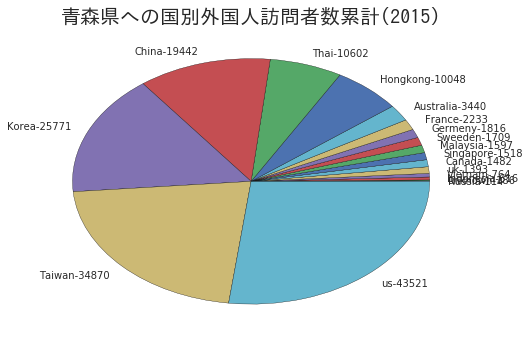

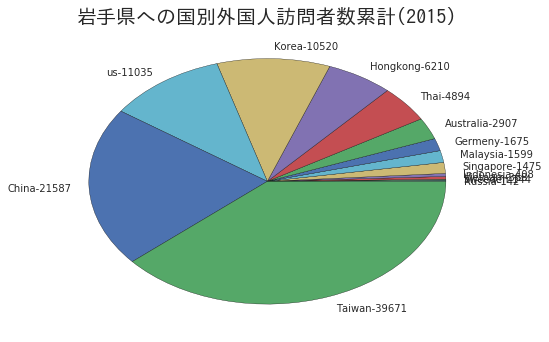

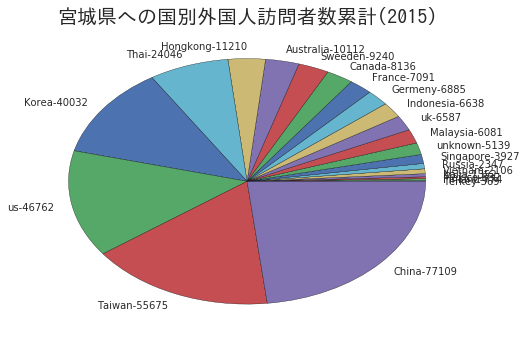

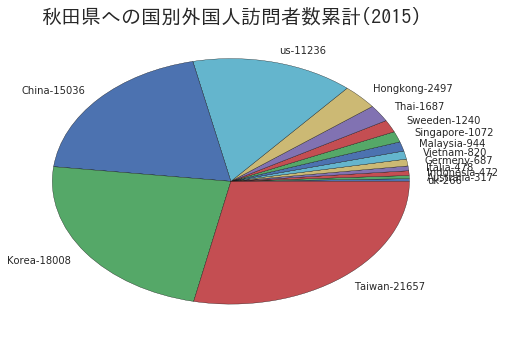

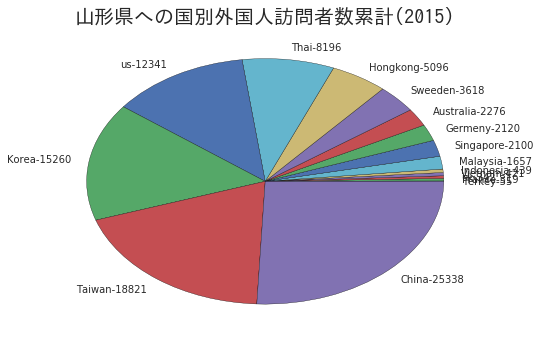

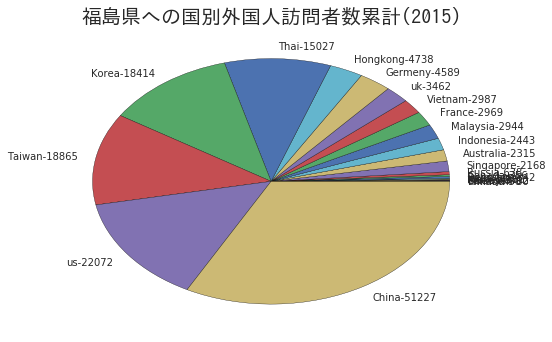

In [4]:
pref = 2
while pref < 8:
  draw_bar_graph_by_year(2015, pref)
  pref += 1

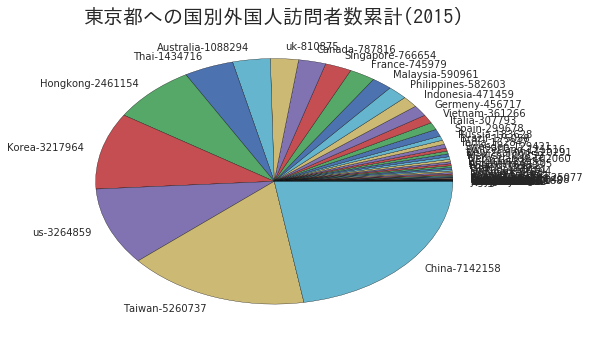

In [28]:
pref = 13
draw_bar_graph_by_year(2015, pref)